# Titanic Exploratory Data Analysis

 References:
 
 http://www.history.com/this-day-in-history/titanic-sinks
 
 https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic

# 1 Introduction

<p align="justify">The RMS Titanic, one of the largest and most luxurious ocean liners ever built from its time. Spanning about 883 feet from stern to bow, a height of 175 feet, and a massive weight of 46,000 tons, it was made to carry about 3,500 passengers and crew. The ship was thought to be unsinkable. However on April 14, 1912 just before midnight, the ship failed to divert its course from an iceberg, which left at least 5 of its hull compartments ruptured. Due to the shortage of lifeboats, only about 700 passengers survived out of the approximately 2,224 passengers on board. 
</p>

<p align="justify">
This exploratory data analysis is submitted as partial fullfilment of the requirements for Udacity's Data Analyst Nanodegree Program. In this notebook, I shall be going into the step by step process of data analysis, in order to answer some questions regarding the given data.
</p>


## 1.1 Data Wrangling

### Imports and Loading the Data 

In [126]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
%matplotlib inline
fig_prefix = '../figures/2015-09-20-as-titanic-explo-lab-'

In [206]:
# Getting the titanic data
titanic_df = pd.read_csv('../data/titanic_data.csv')

### Some information about the data.

In [9]:
# Some information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From here we can see that there are about **891 entries** with a total of **12 columns**. The data types for each column can be observed as well. The variable descriptions as obtained from Kraggle is showed from this text file *[data_descriptions.txt](../data/data_descriptions.txt)* and summarized by the table below:

<img src=../res/table_desc.png />

In [122]:
# Looking at some entries of the data
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


## 1.2 Data Exploration

### Counting the NaN/null entries by column
Upon looking at the data, I observed that some rows have no entries under the Age and Cabin column. In order to explore the data even further, I looked at each column and check the number of NaN entries in that column.

In [32]:
# Counts the number of NaN or null entries in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Upon reading some online resources, I found out that there are options on how to deal with these rows. 

First option is by dropping the rows that have no entries under the Age and Cabin column, but after observing that a large number of rows have no entries under the Age and Cabin column, it would greatly affect my dataset if I were to drop a large number of these rows. 

Hence, my second option, using some basic regression to predict the values of Age and Cabin columns based on other rows' value.

## 1.3 Data Cleaning

### Filling up the Age Column
Since the Age column has the least number of blank entries, I decided to fill this column first. In filling up the missing age, I could have gotten the median age by sex and just subtitute this median age for every missing value based on the sex of that row. But, I have observed from the data that the title of names (i.e. Mr, Ms, Master, etc.) could also have something to do with age, especially that the title `Master` seemed to be associated with children.

    Scratch: Thinking of just finding the median age by sex and putting the median age on the missing values. BUT! Why not try extracting the title of the name (i.e. Mr., Mrs, etc) and then find the median age based on the sex and the title.
    
    Steps:
    1. Split surname by using , as delimiter
    2. Create a list of titles from the data
    3. Unify these titles

### Splitting the Name Column
Using the Name column of the data frame, I would split the name and add three additional columns for that name's title, first name, and surname in the data frame.

In [205]:
# Splitting the surname from the rest of the name
s_surname = titanic_df['Name'].str.split(',', expand=True)

# Splitting the title from the rest of the name
s_title = s_surname[1].str.split('.', expand=True)

# Putting the name sections in series
s_firstname = s_title[1]
s_title = s_title[0]
s_surname = s_surname[0]

# Editing the column name
s_firstname = s_firstname.rename('Firstname')
s_title = s_title.rename('Title')
s_surname = s_surname.rename('Surname')

In [207]:
# Adding the name sections to the data frame
titanic_df = titanic_df.join([s_title, s_firstname, s_surname])

In [208]:
# Confirming that the columns have been added
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Firstname,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry,Allen


Now that the additional columns have been added, I would then would like to look at the different titles that I would be working with.

In [209]:
# Looking at the different titles
titanic_df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [ ]:
a

# 2 Analysis

In this part, I would go further into the analysis of factors that could have affected survivability.

## 2.1 Data Visualization

### Survivability by Sex
As per reports, most of the 700 survivors of Titanic are female, and children. This can be seen and reflected in the graph below.

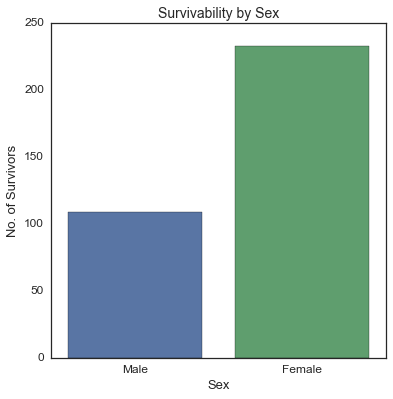

In [127]:
# Looking into survivability by sex
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Sex', y='Survived', data=titanic_df, estimator=np.sum, ci=0)

# Plot Customizations
ax.tick_params(labelsize=12)
ax.set_xticklabels(['Male', 'Female'])
ax.set_xlabel('Sex', fontsize=13)
ax.set_ylabel('No. of Survivors', fontsize=13)
ax.set_title('Survivability by Sex', fontsize=14)

fig.savefig(fig_prefix+'survivability_by_sex')

### Survivability by Class

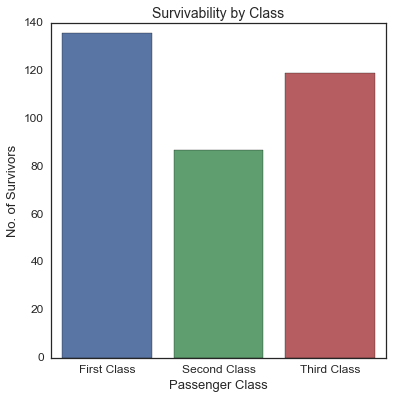

In [128]:
# Looking into survivability by Class
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Pclass', y='Survived', data=titanic_df, estimator=np.sum, ci=0)

# Plot Customizations
ax.tick_params(labelsize=12)
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax.set_xlabel('Passenger Class', fontsize=13)
ax.set_ylabel('No. of Survivors', fontsize=13)
ax.set_title('Survivability by Class', fontsize=14)

fig.savefig(fig_prefix+'survivability_by_class')

### Survivability by Sex in each Class

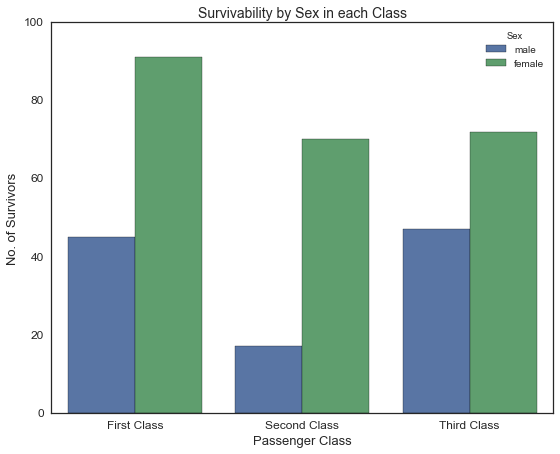

In [131]:
# Looking into survivability by Class
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, estimator=np.sum, ci=0)

# Plot Customizations
ax.tick_params(labelsize=12)
ax.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
ax.set_xlabel('Passenger Class', fontsize=13)
ax.set_ylabel('No. of Survivors', fontsize=13)
ax.set_title('Survivability by Sex in each Class', fontsize=14)

fig.savefig(fig_prefix+'survivability_by_sex_and_class')